In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [2]:
# Load the dataset
datapath = "https://raw.githubusercontent.com/Sahasri12/Statistics_and_Trends/refs/heads/main/Laptop_price.csv" # Data Source: "https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction/data"
df=pd.read_csv(datapath)

In [3]:
# Display the first 5 rows
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [4]:
# Generate descriptive statistics for numerical columns
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [5]:
# Display the number of rows and columns
df.shape

(1000, 7)

In [6]:
# Display a summary of the DataFrame
df.info

<bound method DataFrame.info of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2

In [7]:
#check no of missing values
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [8]:
# Calculate the total number of duplicate rows
sum_duplicate=df.duplicated().sum()
print("Sum of Data Duplicate:",sum_duplicate)

Sum of Data Duplicate: 0


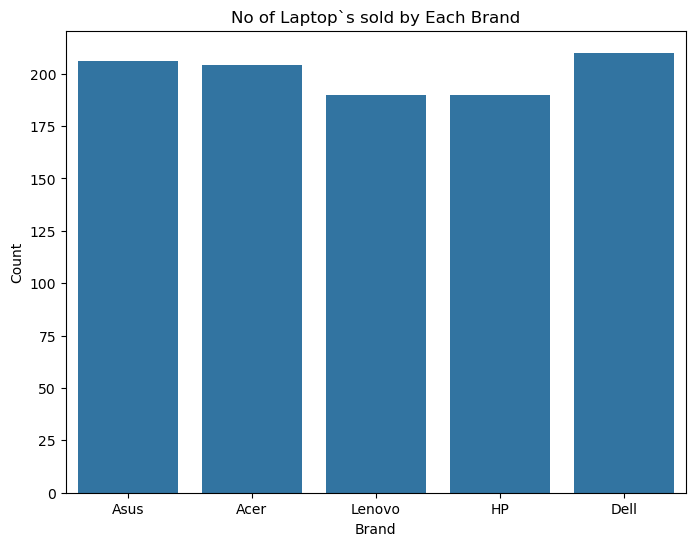

In [38]:
# A bar plot showing the frequency of each 'brand'
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Brand')
plt.title('No of Laptop`s sold by Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

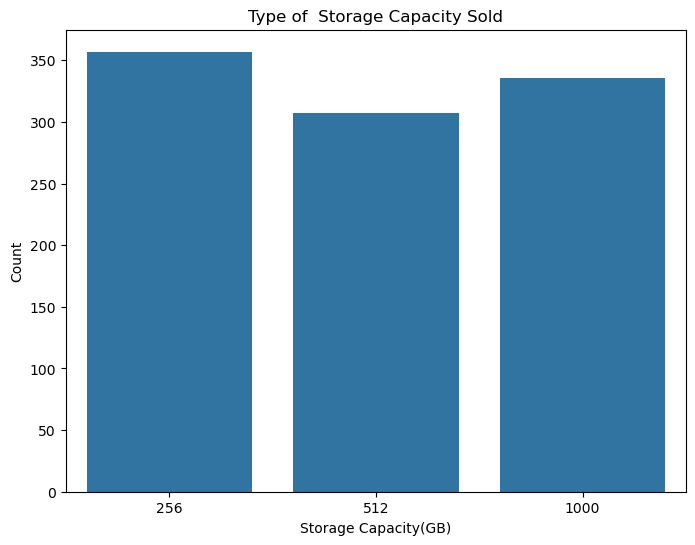

In [10]:
# A bar plot showing the frequency of each 'Storage_Capacity'
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Storage_Capacity')
plt.title('Type of  Storage Capacity Sold')
plt.xlabel('Storage Capacity(GB)')
plt.ylabel('Count')
plt.show()

In [11]:
# Function to calculate the arithmetic mean of an array
def mean(x: np.ndarray) -> float:
    return float(np.mean(np.asarray(x, dtype=float)))

In [12]:
# Function to calculate the sample variance (default ddof=1 for sample)
def variance(x: np.ndarray, ddof: int = 1) -> float:
    x = np.asarray(x, dtype=float)
    n = x.size
    if n - ddof <= 0:
        return float("nan")
    mu = x.mean()
    return float(np.sum((x - mu) ** 2) / (n - ddof))

In [13]:
# Function to calculate the Fisher-Pearson adjusted sample skewness (g1)
def skewness(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    n = x.size
    if n < 3:
        return float("nan")
    mu = x.mean()
    m2 = np.sum((x - mu) ** 2) / (n - 1)
    m3 = np.sum((x - mu) ** 3) / n
    if m2 <= 0:
        return 0.0
    g1 = m3 / (m2 ** 1.5)
    return float((math.sqrt(n * (n - 1)) / (n - 2)) * g1)

In [14]:
# Function to calculate excess kurtosis
def excess_kurtosis(x: np.ndarray) -> float:
    """Excess kurtosis with small-sample adjustment (0 for normal)."""
    x = np.asarray(x, dtype=float)
    n = x.size
    if n < 4:
        return float("nan")
    mu = x.mean()
    m2 = np.sum((x - mu) ** 2) / (n - 1)
    m4 = np.sum((x - mu) ** 4) / n
    if m2 <= 0:
        return 0.0
    g2 = m4 / (m2 ** 2) - 3.0
    adj = ((n - 1) / ((n - 2) * (n - 3))) * ((n + 1) * g2 + 6)
    return float(adj)

In [15]:
# Group the DataFrame by 'Brand' to calculate moments for each group
rows = []
for b, p in df.groupby("Brand"):
    x = p["Price"].to_numpy()
    rows.append({
        "Brand": b,
        "n": x.size,
        "mean": mean(x),
        "variance": variance(x),
        "skewness": skewness(x),
        "excess_kurtosis": excess_kurtosis(x),
    })
moments = pd.DataFrame(rows).sort_values("Brand")
print("FOUR MOMENTS — price by brand")
print(moments.round(4).to_string(index=False), "\n")

FOUR MOMENTS — price by brand
 Brand   n       mean     variance  skewness  excess_kurtosis
  Acer 204 19984.6136 8.665238e+07    0.3315          -1.5393
  Asus 206 19854.2383 9.416219e+07    0.2934          -1.6602
  Dell 210 18866.0100 8.442612e+07    0.5084          -1.3478
    HP 190 19369.7629 8.247905e+07    0.4269          -1.4041
Lenovo 190 19974.9297 9.558154e+07    0.2719          -1.6733 



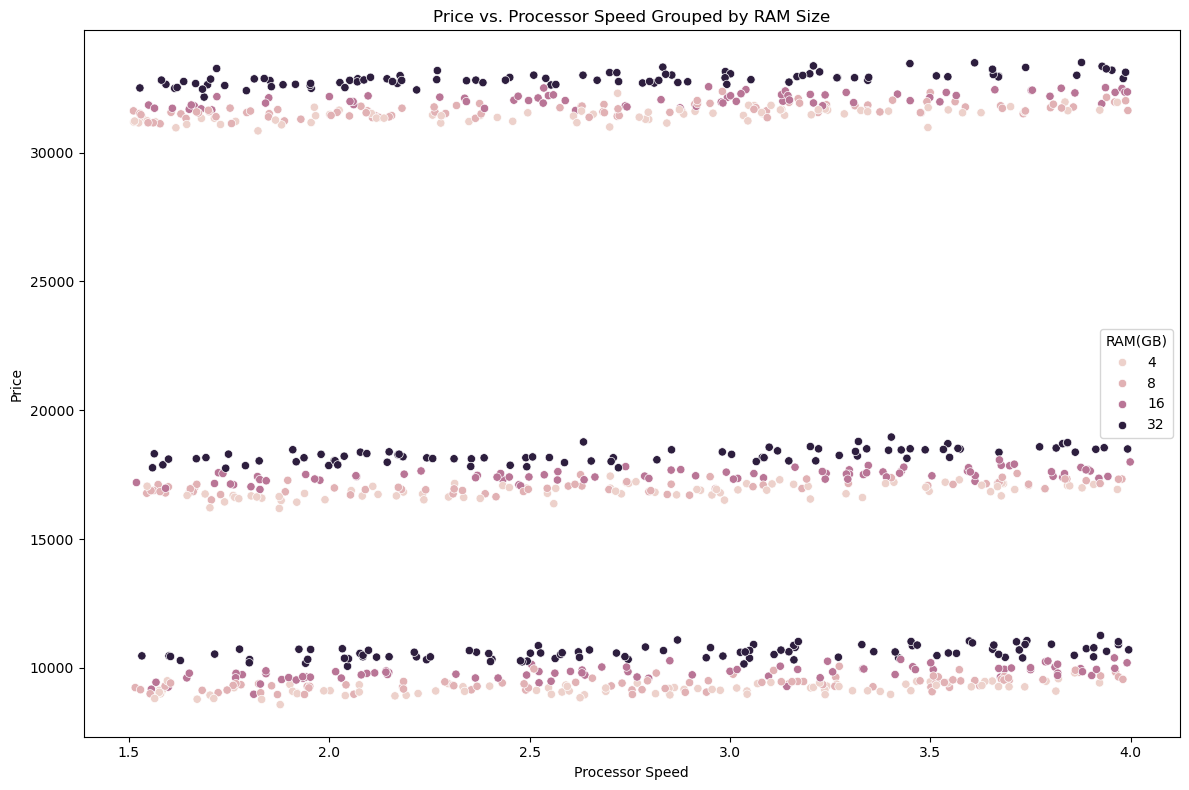

In [16]:
def scatterplot(df):
    """
    Function to plot a scatter plot between Processor_Speed and Price with hue based on RAM_Size.
    """
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Processor_Speed', y='Price', hue='RAM_Size')
    plt.title('Price vs. Processor Speed Grouped by RAM Size')
    plt.xlabel('Processor Speed')
    plt.ylabel('Price')
    plt.legend(title='RAM(GB)')
    plt.tight_layout()
    plt.show()

scatterplot(df)

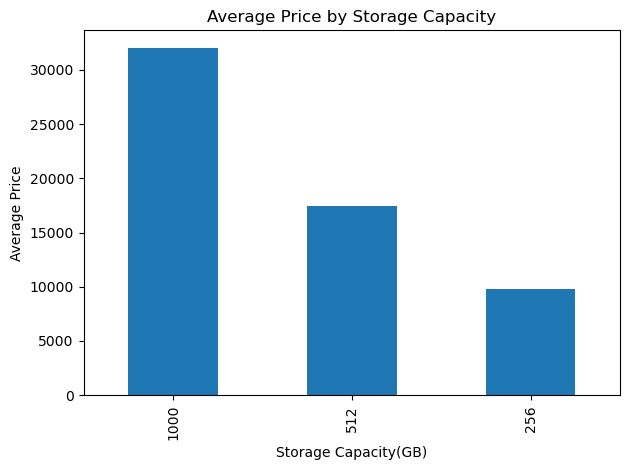

In [17]:

# Average Price by Brand
if "Brand" in df.columns:
    price_by_brand = (
        df.groupby("Storage_Capacity")["Price"]
        .mean()
        .sort_values(ascending=False)
    )
    fig2 = plt.figure()
    price_by_brand.plot(kind="bar")
    plt.xlabel("Storage Capacity(GB)")
    plt.ylabel("Average Price")
    plt.title("Average Price by Storage Capacity")
    plt.tight_layout()
    plt.show()

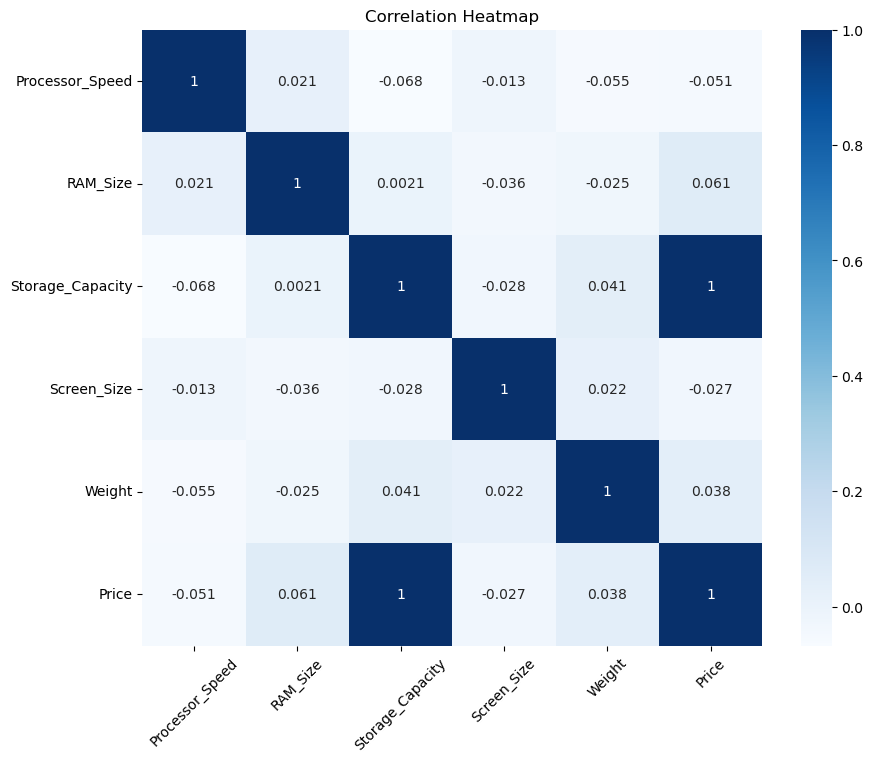

In [18]:
def correlation(df):
    """
    Function to plot a correlation among features.

    Returns a correlation heatmap
    """
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr_matrix, cmap="Blues", annot=True)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
    plt.title('Correlation Heatmap')
    plt.show()

correlation(df)